In [2]:

# https://github.com/galtay/hilbertcurve
!pip install -q hilbertcurve
from hilbertcurve.hilbertcurve import HilbertCurve
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "serif"
plt.set_cmap('tab20b')
plt.rcParams['figure.dpi'] = 100
import seaborn as sns
from math import radians

<Figure size 432x288 with 0 Axes>

# Hilbert Space-Filling Curves


In [0]:
#@title
side = 4
hilbert_curve = HilbertCurve(side, 2)
forward_mapper = np.zeros((side * side), dtype='int32')
reverse_mapper = np.zeros((side * side), dtype='int32')

for ii in range(side*side):
    coords = hilbert_curve.coordinates_from_distance(ii)
    forward_mapper[ii] = coords[0]*side + coords[1]
    reverse_mapper[coords[0]*side + coords[1]] = ii

In [0]:
#@title
ints_mat = np.reshape(np.arange(side * side, dtype='int32'), (side, side))
ints_line = np.reshape(np.arange(side * side, dtype='int32'), (1, side * side))
ints_mapped_mat = np.reshape(reverse_mapper, (side, side))
ints_mapped_line = np.reshape(reverse_mapper, (1, side * side))


A space-filling curve is a path through a grid which covers the entire grid, and only touches each square once. There are various types of such paths. The Hilbert space-filling curve is one of a family of such paths. Unlike some space-filling curves, the Hilbert curve is self-similar (fractal).

![Basic space-filling curve](https://www.bic.mni.mcgill.ca/~mallar/CS-644B/hilbert.gif)

[Good basic explanation of Hilbert space-filling curves](http://www.bic.mni.mcgill.ca/~mallar/CS-644B/hilbert.html)

[Dive into the deep end at Wikipedia](https://en.wikipedia.org/wiki/Hilbert_curve)



This notebook walks through how to use the Hilbert space-filling curve to transform a matrix into another matrix. This transformation has interesting properties for analyzing multi-dimensional data.


# Shuffling a Matrix with the Hilbert Space-Filling Curve

We can rearrange a square matrix using the Hilbert space-filling curve.
The output matrix will have all but one of the squares in a new position, and each cell's value exists in the target matrix. Squares are not deleted or copied. (This is a one-to-one or *bijective* function.)

The following grids show how cells are numbered in a Hilbert path through a 4x4 grid. The left grid shows the conventional computer memory-based addressing. The right grid shows the path through the grid in cell order.

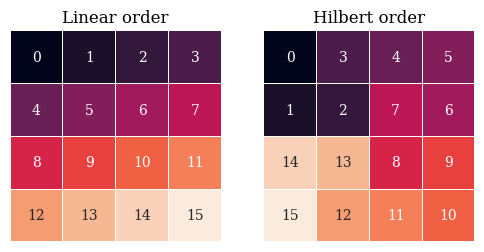

In [5]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Linear order')
ax2.set_title('Hilbert order')
sns.heatmap(ints_mat, ax=ax1, square=True, cbar=False, annot=ints_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
sns.heatmap(ints_mapped_mat, ax=ax2, square=True, cbar=False, annot=ints_mapped_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

We start with the matrix in linear order...

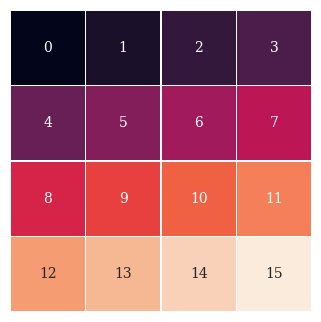

In [6]:
#@title
fig, ax1 = plt.subplots(1, 1)
sns.heatmap(ints_mat, ax=ax1, square=True, cbar=False, annot=ints_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

... unrolls it into a 16-cell vector ...

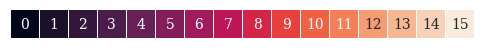

In [7]:
#@title
fig, ax1 = plt.subplots(1, 1)
sns.heatmap(ints_line, ax=ax1, square=True, cbar=False, annot=ints_line, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

... shuffles the contents of each cell to its place along the Hilbert curve...

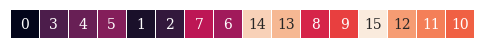

In [8]:
#@title
fig, ax1 = plt.subplots(1, 1)
sns.heatmap(ints_mapped_line, ax=ax1, square=True, cbar=False, annot=ints_mapped_line, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

... then reshapes the resulting vector back into a matrix.

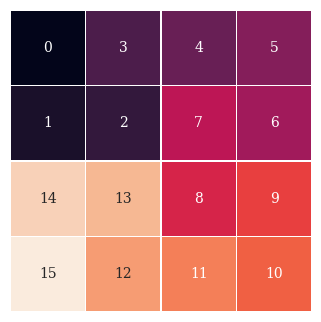

In [9]:
#@title
fig, ax1 = plt.subplots(1, 1)
sns.heatmap(ints_mapped_mat, ax=ax1, square=True, cbar=False, annot=ints_mapped_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

In image-processing terms, this could be called the *Hilbert Shuffle*, the *Space-filling curve shuffle*, or (my favorite) the *Fractal Scramble*. Hilbert shape-filling curves are defined for all finite dimensions, and thus this shuffling operation can be applied to image, 3D voxel data, and any other (hyper-)cubic tensor.

It has been used to map 1-dimensional DNA data into square and cubic tensors. Neighboring genes combine to code for proteins but in a statistically messy way. (Oddly, this is the only published application of the Hilbert Shuffle to Deep Learning that I have found!)

[CNN Model With Hilbert Curve Representation of DNA Sequence For Enhancer Prediction, (Samsung Research, Bangladesh)](https://www.biorxiv.org/content/biorxiv/early/2019/02/27/552141.full.pdf)

### Fractal Nature of the Hilbert Space-filling Curve

Next, we're going to give each row a uniform color.
Note that the rows are now assigned to quadrants. This is because the matrix transform rearranged the cells into square groupings. This illustrates the fact that the Hilbert path is *self-similar*: this square target is replicated at every power of 2.

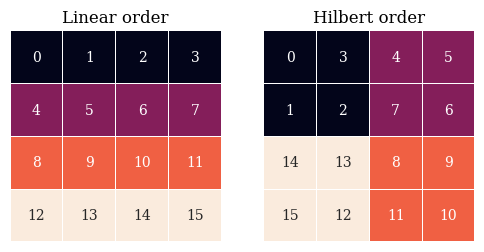

In [20]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Linear order')
ax2.set_title('Hilbert order')
rows = np.zeros((side * side))
for x in range(side):
    rows[x * side: (x * side)+side] = x/side
fill = rows[reverse_mapper]
sns.heatmap(np.reshape(rows, (side, side)), ax=ax1, square=True, cbar=False, annot=ints_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
sns.heatmap(np.reshape(fill, (side, side)), ax=ax2, square=True, cbar=False, annot=ints_mapped_mat, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

# Hilbert Mapping as a Matrix Function

The Hilbert mapping can be directly expressed as a function on the unwrapped line in Step 2. Recall from basic linear algebra that the identity matrix is called this because it is the identity function on a vector.


$$
\begin{pmatrix} x \\ y \\ z \end{pmatrix} * 
\begin{pmatrix} 
1&0&0 \\
0&1&0 \\
0&0&1
\end{pmatrix}
=
\begin{pmatrix} 
x*1&+&y*0&+&z*0 \\
x*0&+&y*1&+&z*0 \\
x*0&+&y*0&+&z*1 \\
\end{pmatrix}
=
\begin{pmatrix} x \\ y \\ z \end{pmatrix}
$$

The Hilbert mapping function, as a matrix, looks like the identity function shown above, except that the 1's are rearranged. (Given that this matrix has to turn a 16-cell vector into another 16-cell vector, it has to be a 16x16 matrix.)

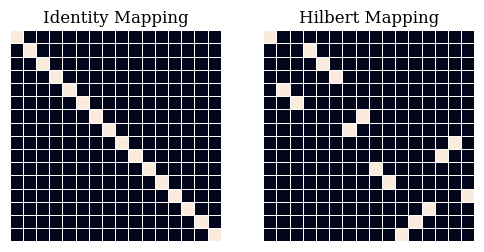

In [10]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Identity Mapping')
ax2.set_title('Hilbert Mapping')

mapping_side = side*side
ident_mapping = np.zeros((mapping_side, mapping_side))
hilbert_mapping = np.zeros((mapping_side, mapping_side))

for x in range(side):
    for y in range(side):
        ident_mapping[x * side + y][x * side + y] = 1
        hilbert_mapping[x * side + y][reverse_mapper[x * side + y]] = 1

sns.heatmap(ident_mapping, ax=ax1, square=True, cbar=False,  xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
sns.heatmap(hilbert_mapping, ax=ax2, square=True, cbar=False, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')

plt.show()


Multiplying a 16-vector by the above Hilbert mapping function gives the rearranged 16-vector:

In [0]:
#@title
sample_data = np.arange(mapping_side)
sample_data_vec = np.reshape(sample_data, (1, mapping_side))
sample_data_sq = np.reshape(sample_data, (side,side))

hilbert_mapped = np.dot(hilbert_mapping, sample_data)
hilbert_mapped_vec = np.reshape(hilbert_mapped, (1, mapping_side))
hilbert_mapped_sq = np.reshape(hilbert_mapped, (side,side))

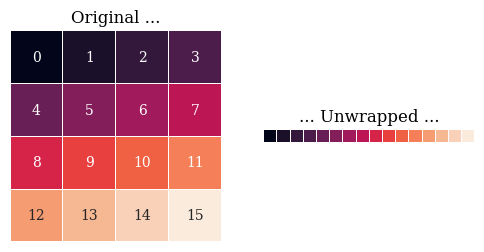

In [12]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Original ...')
ax2.set_title('... Unwrapped ...')


sns.heatmap(sample_data_sq, ax=ax1, square=True, cbar=False, annot=sample_data_sq, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
sns.heatmap(sample_data_vec, ax=ax2, square=True, cbar=False, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')

plt.show()

... multiply this linearized vector by the 16x16 "Hilbert Mapping" matrix above ...

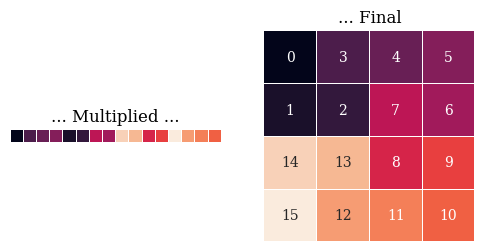

In [18]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('... Multiplied ...')
ax2.set_title('... Final')

sns.heatmap(hilbert_mapped_vec, ax=ax1, square=True, cbar=False, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
sns.heatmap(hilbert_mapped_sq, ax=ax2, square=True, cbar=False, annot=hilbert_mapped_sq, xticklabels=False, yticklabels=False, linewidths=0.01, linecolor='white')
plt.show()

For the three people reading this who like mathematical notation, we take this matrix...

\begin{pmatrix} 
0 & 1 & 2 & 3 \\ 
4 & 5 & 6 & 7 \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15
\end{pmatrix}

express it as a 16-cell vector, multiply it by the above Hilbert mapping function matrix...


$$
\begin{pmatrix} 0 \\ 1 \\ 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \\ 9 \\ 10 \\ 11 \\ 12 \\ 13 \\ 14 \\ 15 \end{pmatrix} * 
\begin{pmatrix} 
1&.&.&.&.&.&.&.&.&.&.&.&.&.&.&.\\
0&.&.&1&.&.&.&.&.&.&.&.&.&.&.&.\\
0&.&.&.&1&.&.&.&.&.&.&.&.&.&.&.\\
0&.&.&.&.&1&.&.&.&.&.&.&.&.&.&.\\
0&1&.&.&.&.&.&.&.&.&.&.&.&.&.&.\\
0&.&1&.&.&.&.&.&.&.&.&.&.&.&.&.\\
0&.&.&.&.&.&.&1&.&.&.&.&.&.&.&.\\
0&.&.&.&.&.&1&.&.&.&.&.&.&.&.&.\\
0&.&.&.&.&.&.&.&.&.&.&.&.&.&1&.\\
0&.&.&.&.&.&.&.&.&.&.&.&.&1&.&.\\
0&.&.&.&.&.&.&.&1&.&.&.&.&.&.&.\\
0&.&.&.&.&.&.&.&.&1&.&.&.&.&.&.\\
0&.&.&.&.&.&.&.&.&.&.&.&.&.&.&1\\
0&.&.&.&.&.&.&.&.&.&.&.&1&.&.&.\\
0&.&.&.&.&.&.&.&.&.&.&1&.&.&.&.\\
0&.&.&.&.&.&.&.&.&.&1&.&.&.&.&.\\
\end{pmatrix}
=
\begin{pmatrix} 
0 \\ 3 \\ 4 \\ 5 \\
1 \\ 2 \\ 7 \\ 6 \\
14 \\ 13 \\ 8 \\ 9 \\
15 \\ 12 \\ 11 \\ 10
\end{pmatrix}
$$

... and then wrap the resulting 16-cell vector as a 2D matrix:

\begin{pmatrix} 
0&3&4&5 \\
1&2&7&6 \\
14&13&8&9 \\
15&12&11&10
\end{pmatrix}


One might assume that there also exists a 4x4 matrix which directly transforms the original matrix into the final. 


$$
\begin{pmatrix} 0&1&2&3 \\ 
4&5&6&7 \\ 
8&9&10&11 \\ 
12&13&14&15 
\end{pmatrix} * 
\begin{pmatrix} 
a&b&c&d \\
e&f&g&h \\
i&j&k&l \\
m&n&o&p
\end{pmatrix}
=
\begin{pmatrix} 
0&3&4&5 \\
1&2&7&6 \\
14&13&8&9 \\
15&12&11&10
\end{pmatrix}
$$

Such a matrix is soluble for the 2x2 case:
[Symbolab](https://www.symbolab.com/solver/matrix-multiply-calculator/solve%20for%20%5Cbegin%7Bpmatrix%7Da%26b%5C%5C%20%20%20%20c%26d%5Cend%7Bpmatrix%7D%2C%20%5Cbegin%7Bpmatrix%7D1%262%5C%5C%203%264%5Cend%7Bpmatrix%7D%5Cbegin%7Bpmatrix%7Da%26b%5C%5C%20c%26d%5Cend%7Bpmatrix%7D%20%3D%5Cbegin%7Bpmatrix%7D1%262%5C%5C%204%263%5Cend%7Bpmatrix%7D)


$$
\begin{pmatrix} 0&1 \\ 
2&3
\end{pmatrix} * 
\begin{pmatrix} 
a&b \\
c&d 
\end{pmatrix}
=
\begin{pmatrix} 
0 &1  \\ 
3 & 2 
\end{pmatrix}
$$

result:

\begin{pmatrix} 
a=2&b=-1 \\
c=0.5&d=1.5
\end{pmatrix}



However, the web site failed for the above 4x4 case:

[Symbolab](https://www.symbolab.com/solver/matrix-multiply-calculator/solve%20for%20%5Cbegin%7Bpmatrix%7Da%26b%26c%26d%5C%5C%20%20%20e%26f%26g%26h%5C%5C%20%20%20i%26j%26k%26l%5C%5C%20%20%20m%26n%26o%26p%5Cend%7Bpmatrix%7D%2C%20%5Cbegin%7Bpmatrix%7D1%261%261%261%5C%5C%20%20%20%201%261%261%261%5C%5C%20%20%20%201%261%261%261%5C%5C%20%20%20%201%261%261%261%5Cend%7Bpmatrix%7D%5Ccdot%5Cbegin%7Bpmatrix%7Da%26b%26c%26d%5C%5C%20%20%20%20e%26f%26g%26h%5C%5C%20%20%20%20i%26j%26k%26l%5C%5C%20%20%20%20m%26n%26o%26p%5Cend%7Bpmatrix%7D%3D%5Cbegin%7Bpmatrix%7D1%261%261%261%5C%5C%20%20%201%261%261%261%5C%5C%20%20%201%261%261%261%5C%5C%20%20%201%261%261%261%5Cend%7Bpmatrix%7D)

Naive application of other equation-solving software has similarly met with failure, at this and other powers of 2. In general, this problem is probably not solvable with linear methods.

In [0]:
#@title
